In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import skbio
import os

import asd
%matplotlib inline

In [2]:
data_dir = "../microbiome-data/run1-4/vsearch-100/cd_even5721/"
uu_fp = os.path.join(data_dir, "bdiv_even5721/unweighted_unifrac_dm.txt")
wu_fp = os.path.join(data_dir, "bdiv_even5721/weighted_unifrac_dm.txt")
bc_fp = os.path.join(data_dir, "bdiv_even5721/bray_curtis_dm.txt")
bj_fp = os.path.join(data_dir, "bdiv_even5721/binary_jaccard_dm.txt")
faithpd_fp = os.path.join(data_dir, "arare_max5721/alpha_div_collated/PD_whole_tree.txt")
observed_otus_fp = os.path.join(data_dir, "arare_max5721/alpha_div_collated/observed_otus.txt")
sample_md_fp = 'combined-map.tsv'

In [3]:
!md5 $uu_fp
!md5 $wu_fp
!md5 $bc_fp
!md5 $bj_fp
!md5 $faithpd_fp
!md5 $observed_otus_fp

MD5 (../microbiome-data/run1-4/vsearch-100/cd_even5721/bdiv_even5721/unweighted_unifrac_dm.txt) = 911f6201d9ca50fb4ad8d4f497b67c7c
MD5 (../microbiome-data/run1-4/vsearch-100/cd_even5721/bdiv_even5721/weighted_unifrac_dm.txt) = 461654a411945af70f514079473457e3
MD5 (../microbiome-data/run1-4/vsearch-100/cd_even5721/bdiv_even5721/bray_curtis_dm.txt) = 0643e894bd31fc3fc82520cf672b101d
MD5 (../microbiome-data/run1-4/vsearch-100/cd_even5721/bdiv_even5721/binary_jaccard_dm.txt) = 97a8500f478ff70c80a43d6b87d2dbb9
MD5 (../microbiome-data/run1-4/vsearch-100/cd_even5721/arare_max5721/alpha_div_collated/PD_whole_tree.txt) = 86263991aae5bb2df4a5305e40759cca
MD5 (../microbiome-data/run1-4/vsearch-100/cd_even5721/arare_max5721/alpha_div_collated/observed_otus.txt) = 4596d971e561c44afc44153737eb6e59


In [4]:
sample_md = pd.read_csv(sample_md_fp, sep='\t', index_col=0, dtype=object)
wu_dm = skbio.DistanceMatrix.read(wu_fp)
uu_dm = skbio.DistanceMatrix.read(uu_fp)
bc_dm = skbio.DistanceMatrix.read(bc_fp)
bj_dm = skbio.DistanceMatrix.read(bj_fp)

In [5]:
faithpd = pd.read_csv(faithpd_fp, sep='\t')
observed_otus = pd.read_csv(observed_otus_fp, sep='\t')

In [6]:
asd.get_donor_sids(sample_md)

{'BBT2014-00029': '6519888d.bb69.495b.b4b8.07d0d4333455',
 'BBT2014-00035': '8d2746d9.68e2.42e3.acfc.092603ad6ec1',
 'BBT2014-00036': '2756472a.03f4.41da.8564.1d7538f949c6',
 'BBT2014-00037': 'b986755d.b15a.4ad4.b6a2.0c7cdd9b8ced',
 'BBT2014-00038': '78ff0b74.3d7e.4ed5.8c2d.a5f77b793718',
 'MD2014-00002': 'ab7ea93a.ebce.4ecf.a56d.01441d5605b3',
 'MD2014-00003': '2ce1e761.4f19.4236.a6a5.49ac820af545'}

In [7]:
sample_md = asd.add_distance_to_donor(sample_md, uu_dm, metric_name='unweighted UniFrac')
sample_md = asd.add_distance_to_donor(sample_md, wu_dm, metric_name='weighted UniFrac')
sample_md = asd.add_distance_to_donor(sample_md, bc_dm, metric_name='Bray-Curtis')
sample_md = asd.add_distance_to_donor(sample_md, bj_dm, metric_name='Jaccard')

In [8]:
sample_md = asd.add_alpha_diversity(sample_md, faithpd, 'Faith PD')
sample_md = asd.add_alpha_diversity(sample_md, observed_otus, 'Observed OTUs')

In [9]:
sample_md

,OldSampleID,BarcodeSequence,LinkerPrimerSequence,run,SampleType,Group,SubjectID,time_point,sequences.per.sample,MostRecentDonorID,...,unweighted UniFrac to initial donor,unweighted UniFrac to most relevant donor,weighted UniFrac to initial donor,weighted UniFrac to most relevant donor,Bray-Curtis to initial donor,Bray-Curtis to most relevant donor,Jaccard to initial donor,Jaccard to most relevant donor,Faith PD,Observed OTUs
#SampleID,,,,,,,,,,,,,,,,,,,,,
595e93ed.e4b3.42b5.91b1.1ad4f31e7134,1.ST001,GTGCAACCAATC,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B101,1,19724,pre-treatment,...,0.773801,0.773801,0.368176,0.368176,0.919944,0.919944,0.972025,0.972025,43.072041,1280.6
bd64992d.87cc.464f.9e1b.9c0156ed65d8,1.ST002,TGTGCGATAACA,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B101,2,28140,BBT2014-00029,...,0.646242,0.646242,0.339452,0.339452,0.668939,0.668939,0.905767,0.905767,55.483458,1403.8
e7a2370c.f80c.4703.b2ee.10c65967e05f,1.ST003,GCGACAATTACA,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B101,3,24792,MD2014-00002,...,0.703337,0.681934,0.324309,0.429491,0.762804,0.755637,0.934877,0.935221,55.450872,1474.4
11f3f37a.3698.4031.8183.75f6f2c6c04c,1.ST004,GCAATTAGGTAC,GTGTGCCAGCMGCCGCGGTAA,1,stool,autism,B101,4,30329,MD2014-00002,...,0.707082,0.727953,0.359218,0.509482,0.782730,0.824856,0.936975,0.947505,50.284798,1298.8
fa2e9bcc.cc53.4b83.ad1e.a308375854f5,1.SW001,TCCCTTGTCTCC,GTGTGCCAGCMGCCGCGGTAA,1,swab,autism,B101,1,24065,pre-treatment,...,0.810820,0.810820,0.750709,0.750709,0.945639,0.945639,0.979487,0.979487,33.395722,925.7
44ef59fb.3279.46dc.a113.c762aa889eb5,1.SW010,GAGCCATCTGTA,GTGTGCCAGCMGCCGCGGTAA,1,swab,autism,B101,10,55169,MD2014-00002,...,0.744782,0.763490,0.473244,0.615336,0.860863,0.854571,0.956425,0.957055,55.838579,1418.4
21a4ec1a.bcae.4e10.be82.66328d2dad4f,1.SW011,CTGCTATTCCTC,GTGTGCCAGCMGCCGCGGTAA,1,swab,autism,B101,11,70368,MD2014-00002,...,0.749334,0.751463,0.657282,0.814525,0.885335,0.877644,0.952124,0.961107,47.981702,1212.8
b1e40907.45fc.4d81.ad81.c58ed3d91e1f,1.SW002,CGGTCAATTGAC,GTGTGCCAGCMGCCGCGGTAA,1,swab,autism,B101,2,50266,pre-treatment,...,0.862072,0.862072,0.896594,0.896594,0.979724,0.979724,0.988153,0.988153,25.177777,842.4
c784e063.e586.43cb.a602.9f2e2ae420d1,1.SW003,AGTCGAACGAGG,GTGTGCCAGCMGCCGCGGTAA,1,swab,autism,B101,3,74215,BBT2014-00029,...,0.691281,0.691281,0.579655,0.579655,0.815242,0.815242,0.933359,0.933359,50.545840,1254.8


## Compare donor and control samples

In [10]:
import scipy
scipy.stats.mannwhitneyu(asd.control_metric(sample_md, sample_type='swab', metric='Faith PD'), 
                         asd.control_metric(sample_md, sample_type='stool', metric='Faith PD'))

MannwhitneyuResult(statistic=120.0, pvalue=0.081947132547735127)

In [11]:
scipy.stats.mannwhitneyu(asd.donor_metric(sample_md, metric='Faith PD', sample_type='swab'),
                         asd.donor_metric(sample_md, metric='Faith PD', sample_type='stool'))

MannwhitneyuResult(statistic=11.0, pvalue=0.90252325017767943)

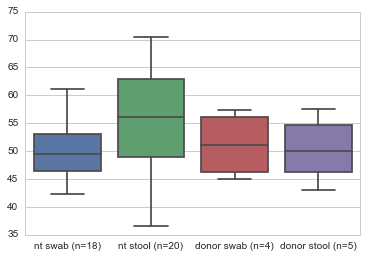

In [12]:
data = [asd.control_metric(sample_md, sample_type='swab', metric='Faith PD'),
        asd.control_metric(sample_md, sample_type='stool', metric='Faith PD'),
        asd.donor_metric(sample_md, metric='Faith PD', sample_type='swab'),
        asd.donor_metric(sample_md, metric='Faith PD', sample_type='stool')]
ax = sns.boxplot(data=data)
ax.set_xticklabels(['nt swab (n=%d)' % len(data[0]), 
                    'nt stool (n=%d)' % len(data[1]),
                    'donor swab (n=%d)' % len(data[2]),
                    'donor stool (n=%d)' % len(data[3])])

In [13]:
asd.donor_metric(sample_md, metric='Faith PD')

[54.673106, 50.050588999999995, 57.554956000000004, 46.24491, 43.0632]

## Change with time: swab

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


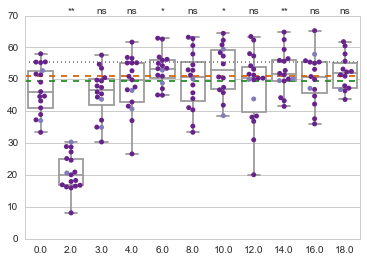

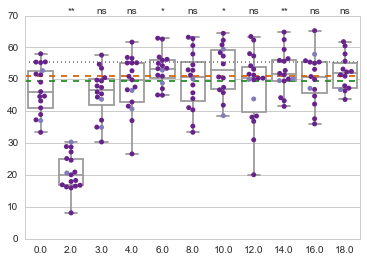

In [14]:
asd.plot_week_data_with_stats(sample_md, sample_type='swab', metric='Faith PD', hue='responder')

## Change with time: stool (Faith PD)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


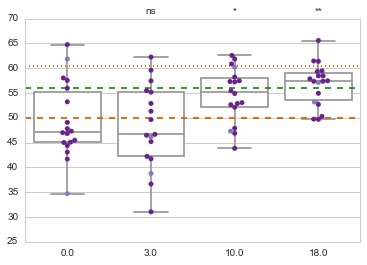

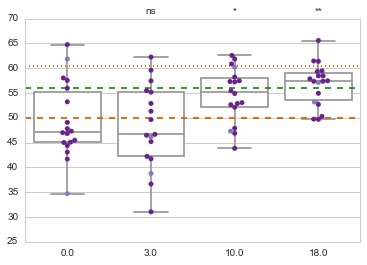

In [15]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
               metric='Faith PD', hue='responder')

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


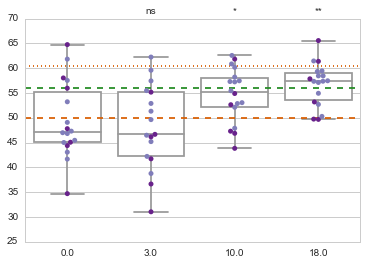

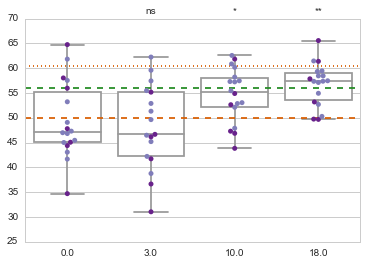

In [16]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
               metric='Faith PD', hue='rectal_oral')

In [17]:
asd.tabulate_week_to_week0_paired_stats(sample_md, sample_type='stool',
                                    metric='Faith PD')

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


,n,Faith PD,test-statistic,p-value,q-value
week,,,,,
0.0,0,NaN,0.0,NaN,NaN
3.0,17,-2.112889,70.0,0.758312,0.758312
10.0,18,5.606396,34.0,0.024907,0.037360
18.0,18,7.388539,12.0,0.001370,0.004109


In [18]:
asd.tabulate_week_to_control_stats(sample_md, sample_type='stool',
                               metric='Faith PD')

,n,Faith PD,test-statistic,p-value,q-value
week,,,,,
0.0,18,47.153514,114.0,0.055504,0.111008
3.0,17,46.662844,100.0,0.034168,0.111008
10.0,18,55.173771,158.0,0.529638,0.706184
18.0,18,57.419133,190.0,0.781216,0.781216


## Change with time: stool (other metrics)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


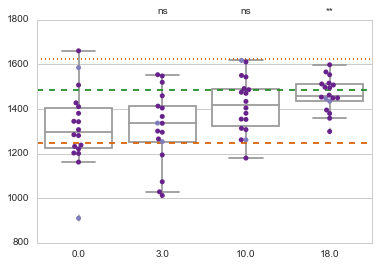

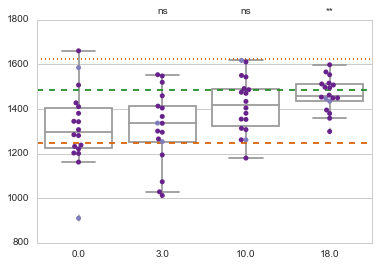

In [19]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
               metric='Observed OTUs', hue='responder')

## Engraftment: Swab

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


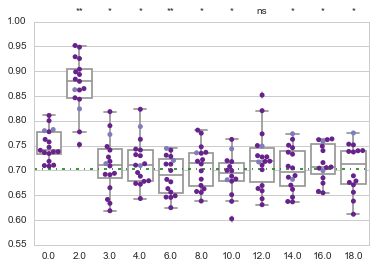

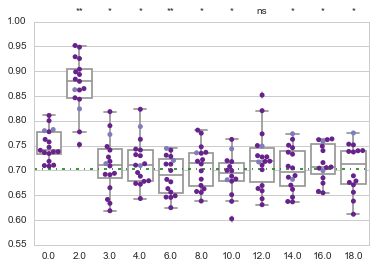

In [20]:
asd.plot_week_data_with_stats(sample_md, sample_type='swab',
                          metric='unweighted UniFrac to most relevant donor', hue='responder',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


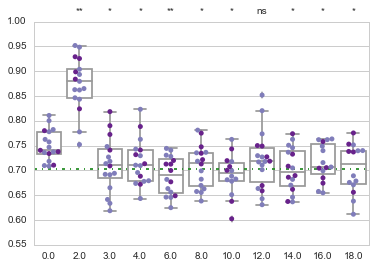

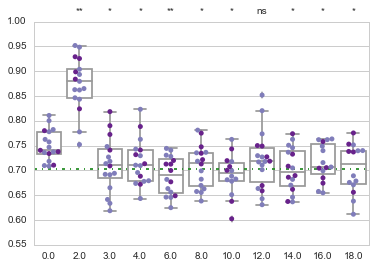

In [21]:
asd.plot_week_data_with_stats(sample_md, sample_type='swab',
                          metric='unweighted UniFrac to most relevant donor', hue='rectal_oral',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)

## Engraftment: stool (unweighted UniFrac)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


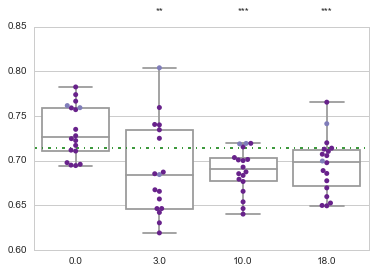

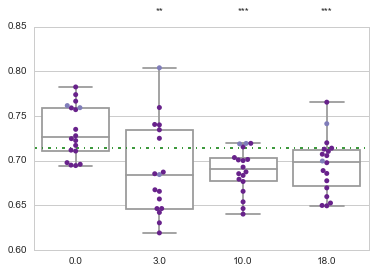

In [22]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='unweighted UniFrac to initial donor', hue='responder',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


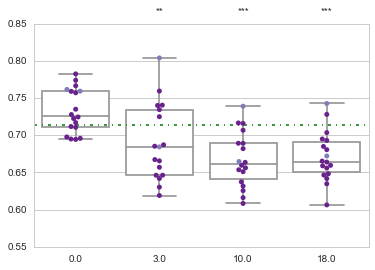

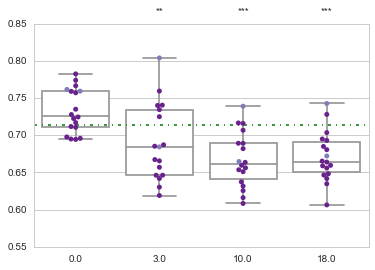

In [23]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='unweighted UniFrac to most relevant donor', hue='responder',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


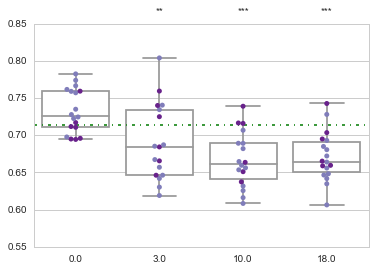

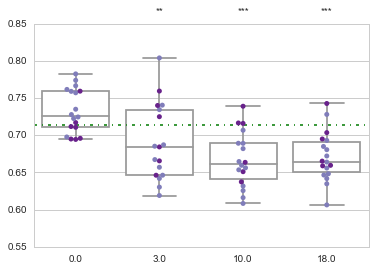

In [24]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='unweighted UniFrac to most relevant donor', hue='rectal_oral',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)

## Engraftment: stool (other metrics)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


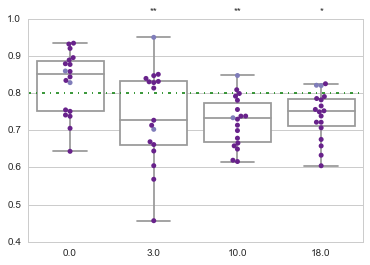

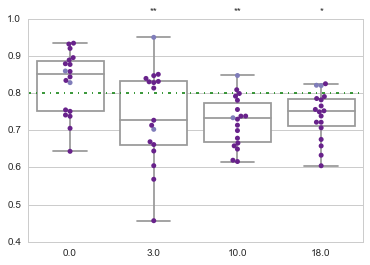

In [25]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='Bray-Curtis to most relevant donor', hue='responder',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=bc_dm)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


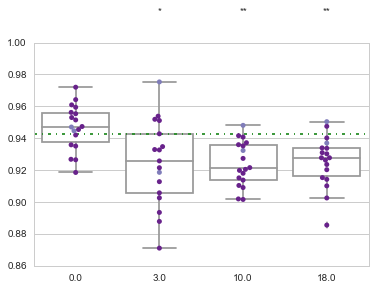

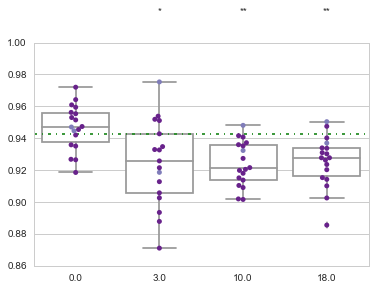

In [26]:
asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='Jaccard to most relevant donor', hue='responder',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=bj_dm)

/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/autism-fmt/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


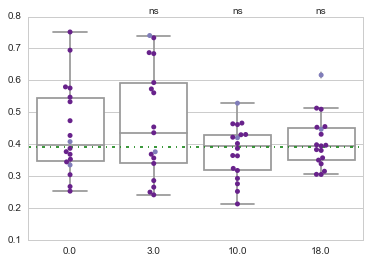

In [27]:
e = asd.plot_week_data_with_stats(sample_md, sample_type='stool',
                          metric='weighted UniFrac to most relevant donor', hue='responder',
                          hide_donor_baseline=True, hide_control_baseline=True, dm=wu_dm)

## Individualized plots

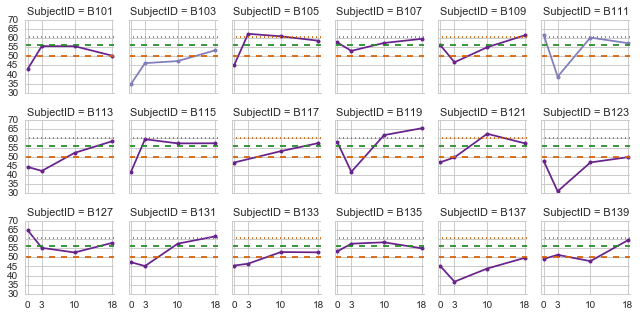

In [28]:
asd.plot_week_data_facet(sample_md, sample_type='stool',
                              metric='Faith PD',
                              hue='responder')

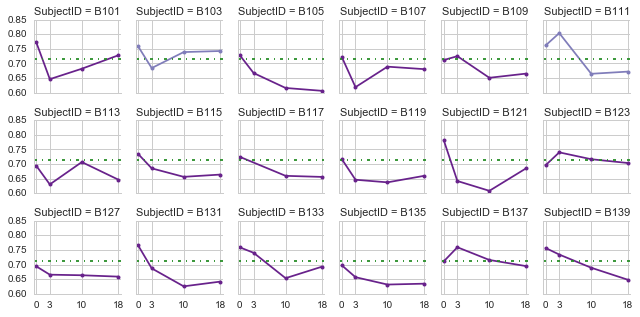

In [29]:
asd.plot_week_data_facet(sample_md, sample_type='stool',
                              metric='unweighted UniFrac to most relevant donor',
                              hue='responder',
                              hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)

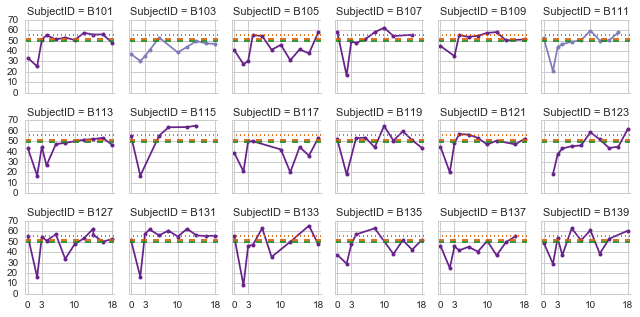

In [30]:
asd.plot_week_data_facet(sample_md, sample_type='swab',
                              metric='Faith PD',
                              hue='responder')

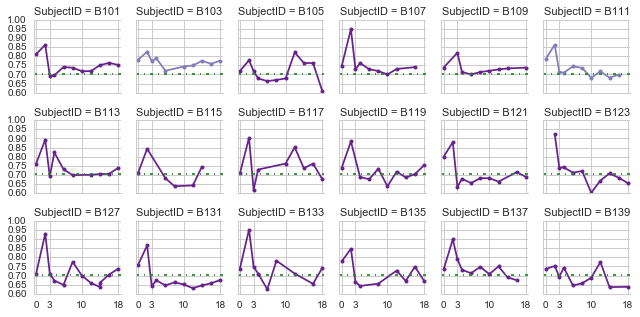

In [31]:
asd.plot_week_data_facet(sample_md, sample_type='swab',
                              metric='unweighted UniFrac to most relevant donor',
                              hue='responder',
                              hide_donor_baseline=True, hide_control_baseline=True, dm=uu_dm)